# Simulačné nástroje

## Kompaktné prostredia

  * http://www.petr-lorenz.com/emgine/  mikropáskové vedenia
  * https://www.freecadweb.org/ parametrický CAD s možnosťou FEM simulácie - mechanika
  * http://www.agros2d.org/ EM, štrukturálna mechanika, prúdenie kvapalín
  * http://onelab.info/ gmsh + GetDP solver
  * ...
  
  
## FEM knižnice a solvery

  * https://goma.github.io/ Sandia Research Lab., mechanika, prúdenie kvapalín, kapilárne javy, odparovanie ... (solver)
  * https://www.dealii.org/ univerzálny FEM simulátor pre PDE (knižnica)
  * https://github.com/mfem/mfem univerzálny FEM simulátor pre PDE (knižnica)
  * http://oofem.org/ štrukturálna mechanika (solver)
  * https://code-aster.org/ termomechanika (solver)
  * http://getfem.org/ univerzálny FEM simulátor, Python interface (solver)
  * http://www.hpfem.org/hermes/ univerzálny FEM simulátor pre PDE (C++ knižnica)
  * http://www.dhondt.de/ Calculix univerzálny FEM simulátor (solver)
  * ...
 
## Simulátory
  * https://projectchrono.org/ multifyzikálny simulátor, FEM, dynamika ... (knižnica, C++, Python)
  * ...
  



# Elmer-CSC

Elmer je open-source multifyzikálny simulačný solver vyvíjaný CSC-IT Center for Science (1995) v spolupráci fínskymi univerzitami a ďaľšími organizáciam, od roku 2005 je open-source. Obsahuje fyzikálne modely pre dynamiku kvapalín, štrukturálnu mechaniku, EM, transport tepla a akustiku.  

## Inštalácia

V Linuxe je súčasťou distribúcií v balíku *elmer-csc-eg* (Linux Mint 19.0), tento balík obsahuje jednoduché prostredie pre generovanie povelových súborov.

## Jednoduchá elektrostatická simulácia 

Vstupnými dátami pre *Elmer* je vygenerovaná sieť s definovanými a pomenovanými fyzickými entitami. Použijeme sieť vygenerovanú z ppríkladu *ex_01.geo*. V príklade budeme simulovať 2D elektrostatické pole dvoch elektrôd na rôznych potenciáloch. Sieť pre simulátor *Elmer* **musí** byť vygenerovaná vo formáte mesh 2.0.\\

Elektródy sú vytvorené ako dutiny, v ktorých sieť negenerujeme, pretože v uzatvorenom kovovom priestore má intenzita statického elektrické poľa nulovú hodnotu.


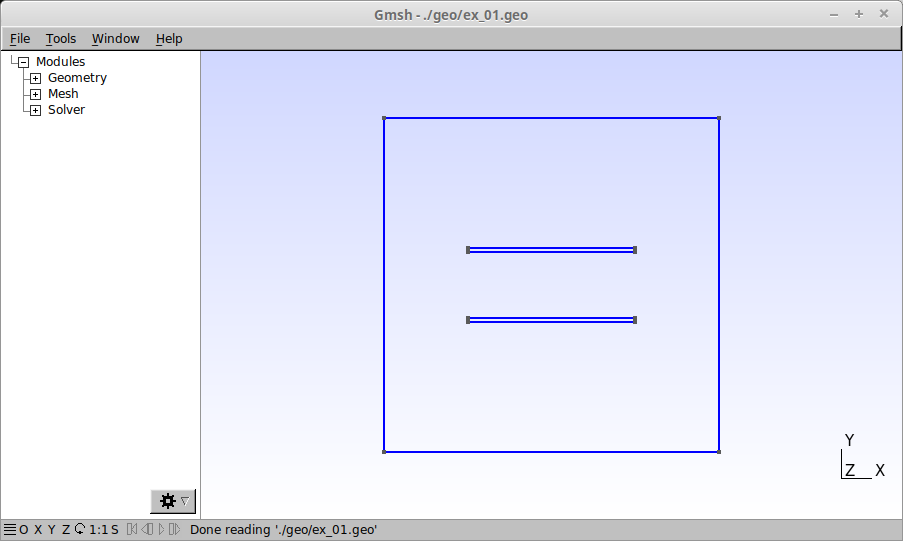

In [5]:
#import os
#_ = os.system("gmsh ./sim/ex_01.msh")  # zobrazenie vygenerovanej siete, neobsahuje logicke entity
from IPython.display import Image
Image(filename='./img/gmsh_02.png', width=650)

## Postup simulácie

Proces simulácie je riadený textovým súborom s príponou *\*.sif*, v ktorom je definovaný typ simulácie, počiatočné podmienky, meteriálové parametre a požadované výstupy. V Elmeri je možné kombinovať viacej typov simulácie, napr. prúdenie kvapaliny v prostredí pri zmenách teploty a pod. 

  * Import mriežky a vvygenerovanie interných mriežok pre solver pomocou programu ElmerGrid
  * Vytvorenie povelového súboru *\*.sif* - v textovom editore alebo pomocou programu ElmerGUI
  * Spustenie simulácie ElmerSolver
  * Spracovanie výsledkov simulácie
  
### Import siete

Interné siete pre solver vygenerujeme pomocou programu ElmerGrid

    ElmerGrid 14 2 ex_01.msh
  
Prorgarm vytvorí pomocý adresár s názvom *ex_01*, do ktorého uloží vygenerované súbory *mesh.\**. 

In [6]:
#_ = os.system("ElmerGrid 14 2 ./sim/ex_01.msh")

### Vytvorenie povelového súboru

Štruktúra *\*.sif* súboru je detailne popísaná v dokumentácii a na množstve [príkladov](http://www.nic.funet.fi/index/elmer/doc/ElmerTutorials_nonGUI.pdf), na začiatku je možné využiť program *ElmerGUI*, pomocou ktorého môžeme vygenerovať ("vyklikať") základnú formu súboru. 

**Poznámka:** Program ElmerGUI je už značne zastaralý, pochádza ešte z dôb, kedy mal byť súčasťou solveru aj pre- a post-processing, vzhľadom k dostupnosti špecializovaných programov (ParaView ...) tvorcovia už tento program nevyvíjajú a ich aktivity sa sústreďujú len na samotný solver.

### Vytvorenie povelového súboru v ElmerGUI

Pre definovaním povelového súboru simulácie je potrebné v ElmerGUI importovať súbor s vygenerovanou sieťou.

In [2]:
# spustenie grafick0ho rozhrania
#_ = os.system("ElmerGUI")

### Definícia typu simulácie

V type simulácie určujeme typ súradnicovej sústavy geometrie usporiadania problému (rotačne-symetrická, karteziánska ... ), fyzikálne konštanty, vstupné a výstupné súbory a pod. 

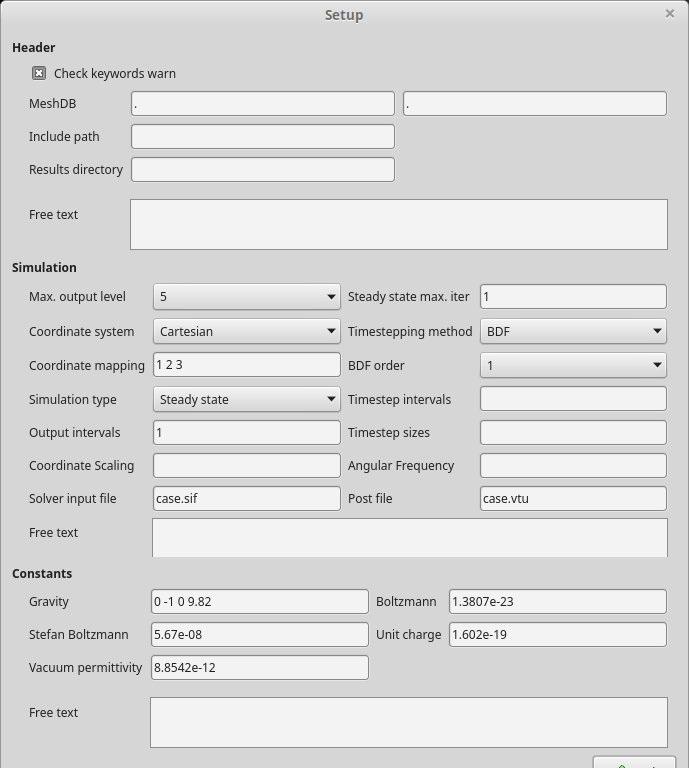

In [7]:
Image(filename='./img/eg_01.png', width=650)

### Výber typu problému, materiálových parametrov, počiatočných a okrajových podmienok

Vmenu *Model* postupne definujeme všetky parametre simulácie. Mená fyzických entít sú nahradené ich poradím, toto poradie je uvedené v záhlaví súboru s vygenerovanou sieťou *\*.msh* Ako okrajové podmienky definujeme potenciály elektrôd a typ okolia, materiálové podmienky definjú permitivitu prostredia.

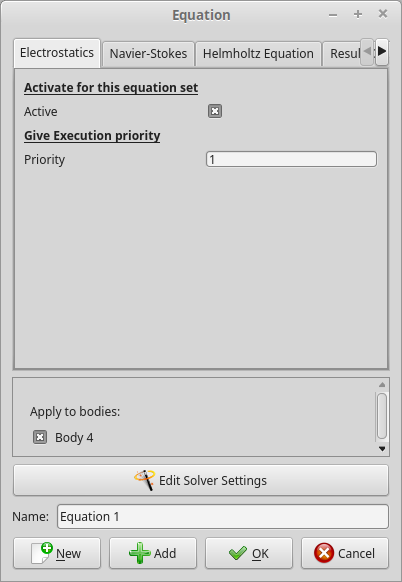

In [8]:
Image(filename='./img/eg_02.png', width=420)

Po definovaní všetkých podmienok v menu *Sif* vygenerujeme povelový súbor a v pod-menu *Edit* ho uložíme (pod menom napr. *case.sif*) do adresáru s vygenerovanými internými sieťami. Do tohoto adresáru uložíme aj štartovací súbor simulátor *ELMERSOLVER_STARTINFO*, ktorý obsahuje meno povelového súboru pre simulátor *ElmerSolver*, ktorý chceme spustiť (pre jednu kofiguráciu/mriežku môžeme mať vytvorených niekoľko simulácií, s rôznymi počiatočnými podmienkami a pod.)

    case.sif

alebo simuláciu spustíme z konzoly priamo aj s vygenerovaním štartovacieho súboru
    
    echo case.sif > ELMERSOLVER_STARTINFO & ElmerSolver

### Vytvorenie povelového súboru v textovom editore

Vytváranie povelového súboru z menu môže byť zdĺhavé a neflexibilné, ak potrebujeme meniť čiastkové parametre napr. okrajové podminky pri opakovaných simuláciách. Povelový súbor môžeme vytvoriť aj jednoducho v textovom editore alebo ho môžeme generovať jednoduchým skriptom. 

Detailne popísané povelové súbory k príkladom z rôznych typov simulácií sú popísané v dokumentácii [ElmerTutorials_nonGUI](http://www.nic.funet.fi/index/elmer/doc/ElmerTutorials_nonGUI.pdf). 

Povelový súbor je rozdelený na niekoľko sekcií:

**Všeobecné parametre simulácie**

    Simulation
      Max Output Level = 5
      Coordinate System = Cartesian        ! vyber typu suradnicoveho systemu
      Coordinate Mapping(3) = 1 2 3        ! moznost vymeny suradnicovyxh osi
      Simulation Type = Steady state
      Steady State Max Iterations = 1
      Output Intervals = 1
      Timestepping Method = BDF
      BDF Order = 1
      Solver Input File = case.sif          ! ignorovane ...
      Post File = case.vtu
    End
    
**Konštanty**

    Constants                               ! staci uvadzat len tie konstanty
      Gravity(4) = 0 -1 0 9.82              ! ktore su relevantne pre dany typ simulacie
      Stefan Boltzmann = 5.67e-08
      Permittivity of Vacuum = 8.8542e-12
      Boltzmann Constant = 1.3807e-23
      Unit Charge = 1.602e-19
    End

**Definícia problému**

Pre komplexnejšie problémy môžeme mať definovaných niekoľko solverov. V procese simulácie sa v každom kroku na riešenie úlohy použijú všetky solvery, ich poradie a prioritu je možné voliť.

    Solver 1
      Equation = Electrostatics
      Calculate Electric Energy = True
      Procedure = "StatElecSolve" "StatElecSolver"
      Variable = Potential
      Calculate Electric Flux = True
      Calculate Electric Field = True
      Exec Solver = Always
      ... kopa dalsich nastaveni
      ... pre linearny a nelinearny solver
    End

**Výber skupiny rovníc pre riešenie problému**

V definícii problému môžeme mať definovaných niekoľko typov solverov, je možné z nich kombinovať rôzne typy rovníc, ktoré môžu byť použité na rôzne časti problému, napr. pri simulácii prúdenia kvapaliny potrubím, ktorého rozmery sa menia s teplotou.

    Equation 1
      Name = "Equation 1"
      Active Solvers(1) = 1
    End

**Definícia materiálov a ich vlastností**

    Material 1
      Name = "Material 1"
      Relative Permittivity = 1
    End
    
**Výber rovníc pre jednotlivé fyzické entity**    

Teleso 1 je z materiálu 1 a pre riešenie sa použije skupina rovníc 1.

    Body 1
      Target Bodies(1) = 4
      Name = "Body 1"
      Equation = 1
      Material = 1
    End

**Okrajové podmienky**

Definícia okrajových podmienok pre hranice problému. Položky závisia od typu problému, jednotky sú v SI.

    Boundary Condition 1
      Target Boundaries(1) = 1 
      Name = "BoundaryCondition 1"
      Potential = 10                    ! potencial elektrody +10 [V]
    End

    Boundary Condition 2
      Target Boundaries(1) = 2 
      Name = "BoundaryCondition 2"
      Potential = -10
    End

    Boundary Condition 3
      Target Boundaries(1) = 3 
      Name = "BoundaryCondition 3"
      Potential = 0
    End
    
    